In [1]:
import pandas as pd 
import numpy as np 
%matplotlib inline 
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# path to reviews
inputFilePath='../data/app_29_Tally-Credit-Card-Debt-Payoff-Planner--Pay-Bills.csv'

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/shashwat/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
reviews = pd.read_csv(inputFilePath)
reviews = reviews.reset_index(drop = True)
len(reviews)
reviews.columns
reviews.head()

595

Index(['name', 'ratings', 'date', 'helpful vote', 'comment'], dtype='object')

,name,ratings,date,helpful vote,comment
0,Jessica Geffre,5,"April 4, 2019",42,Would definitely recommend. It's great to just...
1,Slowmoefresh415,1,"March 20, 2019",123,Why would you have a credit card app NOT fit f...
2,Carlos M. Lopez II,1,"March 24, 2019",36,I dont feel comfortable with the fact that you...
3,Josh Bomgardner,1,"March 26, 2019",65,SCAM ALERT - BEWARE - DO NOT DOWNLOAD AT ALL C...
4,Chanel Harrington,3,"April 12, 2019",3,very helpful in order to pay down your debt. t...


In [3]:
reviews = reviews[['comment']] # discard all except text
reviews.head(5)

,comment
0,Would definitely recommend. It's great to just...
1,Why would you have a credit card app NOT fit f...
2,I dont feel comfortable with the fact that you...
3,SCAM ALERT - BEWARE - DO NOT DOWNLOAD AT ALL C...
4,very helpful in order to pay down your debt. t...


In [4]:
# vader combines {pos, neg, neu} into a single measure called 'compound'.
reviews['vader-compound-score'] = reviews.apply(lambda review: analyser.polarity_scores(review['comment'])['compound'], axis=1)

In [5]:
reviews.head(5)

,comment,vader-compound-score
0,Would definitely recommend. It's great to just...,0.9359
1,Why would you have a credit card app NOT fit f...,0.9047
2,I dont feel comfortable with the fact that you...,-0.1969
3,SCAM ALERT - BEWARE - DO NOT DOWNLOAD AT ALL C...,-0.8918
4,very helpful in order to pay down your debt. t...,0.8977


In [6]:
def assignSentiment(compoundScore):
    if (compoundScore <= 0):
        return 'negative'
    elif ((compoundScore > 0) & (compoundScore < 0.7)):
        return 'neutral'
    else:
        return 'positive'

reviews['assigned-sentiment'] = reviews.apply(lambda review: assignSentiment(review['vader-compound-score']), axis=1)



In [7]:
reviews.head(5)

,comment,vader-compound-score,assigned-sentiment
0,Would definitely recommend. It's great to just...,0.9359,positive
1,Why would you have a credit card app NOT fit f...,0.9047,positive
2,I dont feel comfortable with the fact that you...,-0.1969,negative
3,SCAM ALERT - BEWARE - DO NOT DOWNLOAD AT ALL C...,-0.8918,negative
4,very helpful in order to pay down your debt. t...,0.8977,positive


In [8]:
negativeReviews=reviews[reviews['assigned-sentiment']=='negative']
len(negativeReviews)

178

In [9]:
pd.set_option('display.max_colwidth', -1)
negativeReviews.head(5)

,comment,vader-compound-score,assigned-sentiment
2,I dont feel comfortable with the fact that you are keeping my account active and open when I didn't get approved. I want to delete all info I put but you dont have an option for that. I'm going to have to report this app.,-0.1969,negative
3,SCAM ALERT - BEWARE - DO NOT DOWNLOAD AT ALL COSTS: Deceitful. I was above the requirements and still denied. I read that the same thing happened to someone else as well. Just a SCAM.,-0.8918,negative
23,"after targeting me multiple times with adds I finally gave it a shot. sign up wasn't ez, it didn't want to connect to my cards, I finally was able to connect with 1 card I didn't got approved despite having a credit score higher than 660. useless!",-0.8377,negative
32,"It incorrectly identifies my card as another bank. Also, I have great credit but was still denied.",-0.1280,negative
33,This app isn't for people with crappy credit it's for people with good credit who are looking to consolidate their debt and lower their interest rate. This app helped me. My only complaint is that the interface kind of sucks.,-0.2944,negative


In [12]:
textSeq=''.join(negativeReviews['comment'])
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt 
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, colormap='brg', background_color='black', width=3000, height=2000, font_path="/usr/share/fonts/truetype/tlwg/Waree.ttf").generate(textSeq)

<Figure size 1440x720 with 0 Axes>

(-0.5, 2999.5, 1999.5, -0.5)

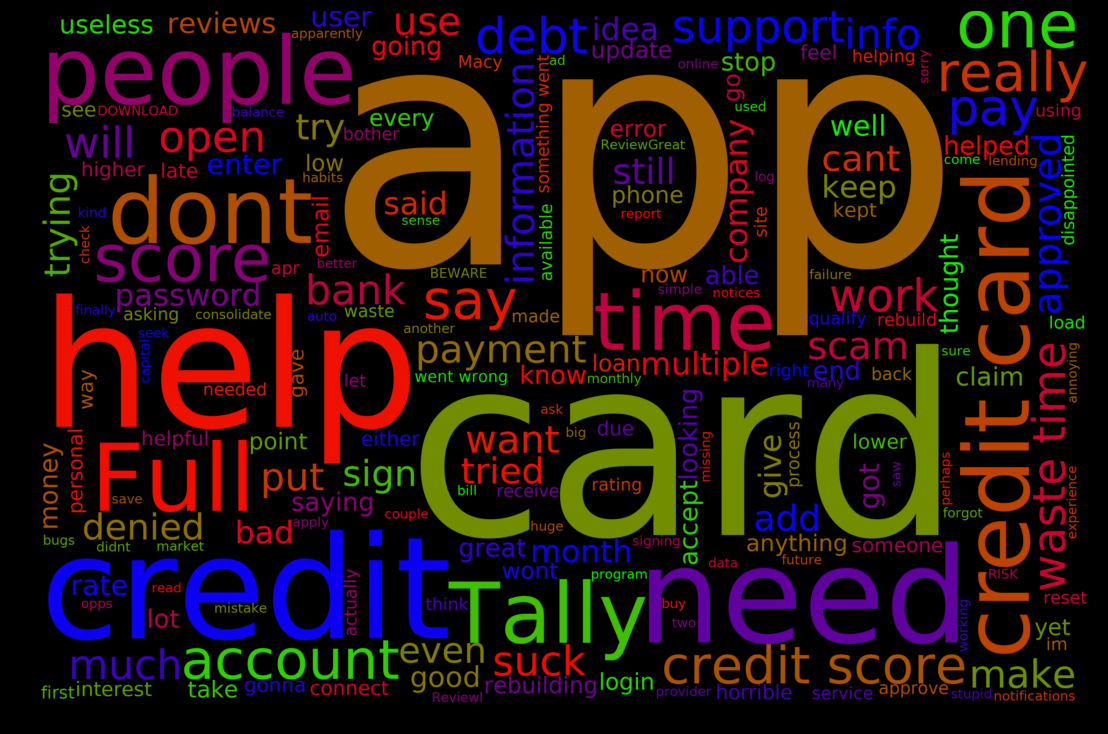

In [13]:
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
#plt.savefig('wordcloud_tally.png', facecolor='k', bbox_inches='tight')